In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics, neighbors, preprocessing,\
    decomposition, ensemble, model_selection, pipeline,\
    naive_bayes, neural_network

## I. Apprentissage supervisé : Feature engineering et Classification

### Chargement des données et préparation

In [2]:
credit_scoring_data = pd.read_csv('credit_scoring.csv', sep=';')

In [3]:
credit_scoring_data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
# Data
X = credit_scoring_data.ix[:, :-1].values
# Target
y = credit_scoring_data.ix[:, -1].values

Dimensions des données : (4375, 13)
Dimensions des targets : (4375,)


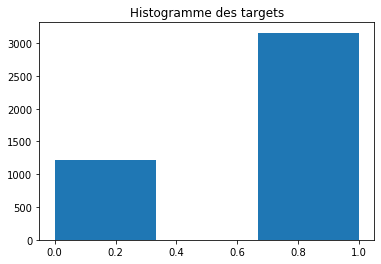

In [5]:
print('Dimensions des données :', X.shape)
print('Dimensions des targets :', y.shape)
plt.hist(y, bins=3)
plt.title('Histogramme des targets')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
print('Dimensions de X_train :', X_train.shape)
print('Dimensions de X_test :', X_test.shape)
print('Dimensions de y_train :', y_train.shape)
print('Dimensions de y_test :', y_test.shape)

Dimensions de X_train : (2187, 13)
Dimensions de X_test : (2188, 13)
Dimensions de y_train : (2187,)
Dimensions de y_test : (2188,)


### Apprentissage et évaluation de modèles

#### Normalisation des données

In [7]:
# StandardScaler
SS = preprocessing.StandardScaler()
SS.fit(X_train)
X_train_ss = SS.transform(X_train)
SS.fit(X_test)
X_test_ss = SS.transform(X_test)

# MinMaxScaler
MM = preprocessing.MinMaxScaler()
MM.fit(X_train)
X_train_mm = MM.transform(X_train)
MM.fit(X_test)
X_test_mm = MM.transform(X_test)

#### Evaluation des modèles

In [8]:
def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_predict)
    pre = metrics.precision_score(y_test, y_predict)
    rec = metrics.recall_score(y_test, y_predict)
    
    print('Accuracy du modèle :', acc)
    print('Precision du modèle :', pre)
    print('Recall du modèle :', rec)
    print()
    print('Matrice de confusion :')
    print()
    print(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_predict),
        columns=['Prédit 0', 'Prédit 1'],
        index=['Vrai 0', 'Vrai 1']
    ))

#### CART

In [9]:
cart = tree.DecisionTreeClassifier(random_state=1)
print('Données non normalisées :\n')
evaluate(cart, X_train, X_test, y_train, y_test)
print('\n\nDonnées normalisées avec StandardScaler :\n')
evaluate(cart, X_train_ss, X_test_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler :\n')
evaluate(cart, X_train_mm, X_test_mm, y_train, y_test)

Données non normalisées :

Accuracy du modèle : 0.7271480804387569
Precision du modèle : 0.8194174757281554
Recall du modèle : 0.7992424242424242

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       325       279
Vrai 1       318      1266


Données normalisées avec StandardScaler :

Accuracy du modèle : 0.7180073126142597
Precision du modèle : 0.8183015141540487
Recall du modèle : 0.7847222222222222

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       328       276
Vrai 1       341      1243


Données normalisées avec MinMaxScaler :

Accuracy du modèle : 0.7221206581352834
Precision du modèle : 0.8116219667943806
Recall du modèle : 0.80239898989899

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       309       295
Vrai 1       313      1271


#### KNN

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
print('Données non normalisées :\n')
evaluate(knn, X_train, X_test, y_train, y_test)
print('\n\nDonnées normalisées avec StandardScaler :\n')
evaluate(knn, X_train_ss, X_test_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler :\n')
evaluate(knn, X_train_mm, X_test_mm, y_train, y_test)

Données non normalisées :

Accuracy du modèle : 0.7248628884826326
Precision du modèle : 0.7709713024282561
Recall du modèle : 0.8819444444444444

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       189       415
Vrai 1       187      1397


Données normalisées avec StandardScaler :

Accuracy du modèle : 0.7495429616087751
Precision du modèle : 0.8087008343265792
Recall du modèle : 0.8566919191919192

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       283       321
Vrai 1       227      1357


Données normalisées avec MinMaxScaler :

Accuracy du modèle : 0.7513711151736746
Precision du modèle : 0.8002309468822171
Recall du modèle : 0.875

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       258       346
Vrai 1       198      1386


### Création de nouvelles variables

In [11]:
pca = decomposition.PCA(n_components=.95)

pca.fit(X_train_ss)
X_train_pca_ss = pca.transform(X_train_ss)
X_train_pca_ss = np.append(X_train_ss[:], X_train_pca_ss[:, :3], axis=1)

pca.fit(X_train_mm)
X_train_pca_mm = pca.transform(X_train_mm)
X_train_pca_mm = np.append(X_train_mm[:], X_train_pca_mm[:, :3], axis=1)

pca.fit(X_test_ss)
X_test_pca_ss = pca.transform(X_test_ss)
X_test_pca_ss = np.append(X_test_ss[:], X_test_pca_ss[:, :3], axis=1)

pca.fit(X_test_mm)
X_test_pca_mm = pca.transform(X_test_mm)
X_test_pca_mm = np.append(X_test_mm[:], X_test_pca_mm[:, :3], axis=1)

#### CART

In [12]:
print('Données normalisées avec StandardScaler + PCA best variables :\n')
evaluate(cart, X_train_pca_ss, X_test_pca_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler + PCA best variables :\n')
evaluate(cart, X_train_pca_mm, X_test_pca_mm, y_train, y_test)

Données normalisées avec StandardScaler + PCA best variables :

Accuracy du modèle : 0.7239488117001828
Precision du modèle : 0.8279785809906292
Recall du modèle : 0.7809343434343434

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       347       257
Vrai 1       347      1237


Données normalisées avec MinMaxScaler + PCA best variables :

Accuracy du modèle : 0.6992687385740403
Precision du modèle : 0.8050065876152833
Recall du modèle : 0.7714646464646465

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       308       296
Vrai 1       362      1222


#### KNN

In [13]:
print('Données normalisées avec StandardScaler + PCA best variables :\n')
evaluate(knn, X_train_pca_ss, X_test_pca_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler + PCA best variables :\n')
evaluate(knn, X_train_pca_mm, X_test_pca_mm, y_train, y_test)

Données normalisées avec StandardScaler + PCA best variables :

Accuracy du modèle : 0.7600548446069469
Precision du modèle : 0.8101933216168717
Recall du modèle : 0.8731060606060606

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       280       324
Vrai 1       201      1383


Données normalisées avec MinMaxScaler + PCA best variables :

Accuracy du modèle : 0.7458866544789763
Precision du modèle : 0.7900677200902935
Recall du modèle : 0.8838383838383839

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       232       372
Vrai 1       184      1400


### Sélection de variables

['Income' 'Seniority' 'pca_2' 'pca_3' 'Price' 'pca_1' 'Amount' 'Age'
 'Assets' 'Records' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']


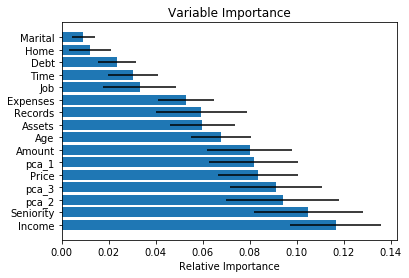

In [14]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca_ss, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.append(credit_scoring_data.columns[:-1].values, ['pca_1', 'pca_2', 'pca_3'])
print(features[sorted_idx])
padding = np.arange(X_train_pca_ss.size/len(X_train_pca_ss)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

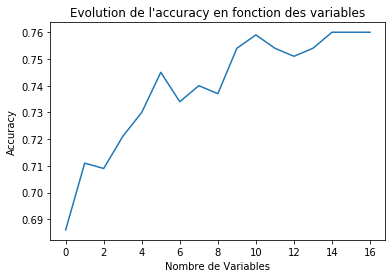

In [15]:
scores = np.zeros(X_train_pca_ss.shape[1] + 1)
for f in np.arange(0, X_train_pca_ss.shape[1] + 1):
    X1_f = X_train_pca_ss[:,sorted_idx[:f+1]]
    X2_f = X_test_pca_ss[:,sorted_idx[:f+1]]
    knn.fit(X1_f,y_train)
    yknn = knn.predict(X2_f)
    scores[f] = np.round(metrics.accuracy_score(y_test, yknn), 3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

['Income' 'pca_3' 'pca_2' 'Seniority' 'pca_1' 'Amount' 'Price' 'Age'
 'Assets' 'Records' 'Expenses' 'Time' 'Debt' 'Job' 'Home' 'Marital']


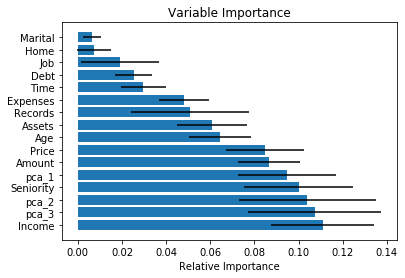

In [16]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca_mm, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.append(credit_scoring_data.columns[:-1].values, ['pca_1', 'pca_2', 'pca_3'])
print(features[sorted_idx])
padding = np.arange(X_train_pca_mm.size/len(X_train_pca_mm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

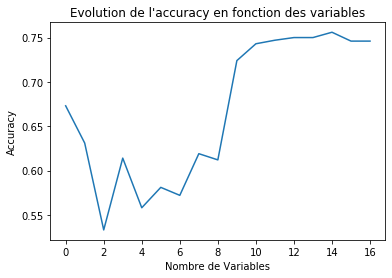

In [17]:
scores = np.zeros(X_train_pca_mm.shape[1] + 1)
for f in np.arange(0, X_train_pca_mm.shape[1] + 1):
    X1_f = X_train_pca_mm[:,sorted_idx[:f+1]]
    X2_f = X_test_pca_mm[:,sorted_idx[:f+1]]
    knn.fit(X1_f,y_train)
    yknn = knn.predict(X2_f)
    scores[f] = np.round(metrics.accuracy_score(y_test, yknn), 3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

### Paramétrage des classifieurs

#### CART

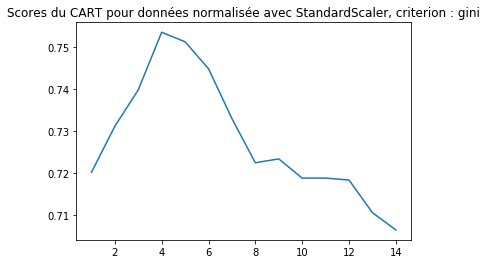

Meilleur score obtenu : 0.7535436671239141  pour max_depth = 4


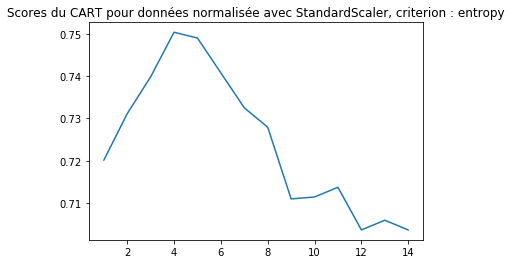

Meilleur score obtenu : 0.7503429355281207  pour max_depth = 4


In [18]:
criterions = ['gini', 'entropy']
depths = list(range(1, 15))
tunable_params = {'criterion': criterions, 'max_depth': depths}
grid = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_ss, y_train)

for i, criterion in enumerate(criterions):
    plt.plot(depths, grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)])
    plt.title('Scores du CART pour données normalisée avec StandardScaler, criterion : ' + criterion)
    plt.show()
    print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]), 
          ' pour max_depth =', np.argmax(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]) + 1)

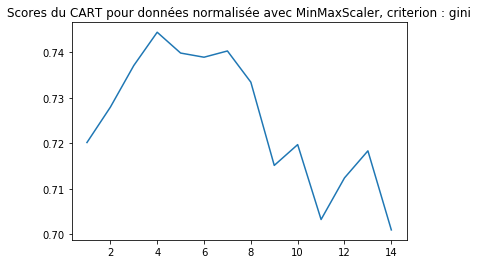

Meilleur score obtenu : 0.7443987197073617  pour max_depth = 4


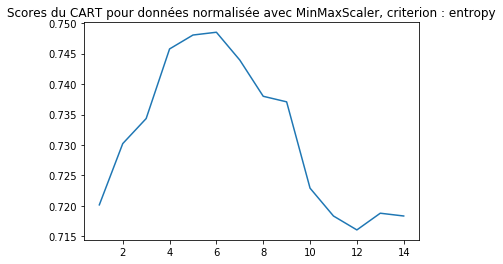

Meilleur score obtenu : 0.7485139460448103  pour max_depth = 6


In [19]:
criterions = ['gini', 'entropy']
depths = list(range(1, 15))
tunable_params = {'criterion': criterions, 'max_depth': depths}
grid = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_mm, y_train)

for i, criterion in enumerate(criterions):
    plt.plot(depths, grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)])
    plt.title('Scores du CART pour données normalisée avec MinMaxScaler, criterion : ' + criterion)
    plt.show()
    print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]), 
          ' pour max_depth =', np.argmax(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]) + 1)

#### KNN

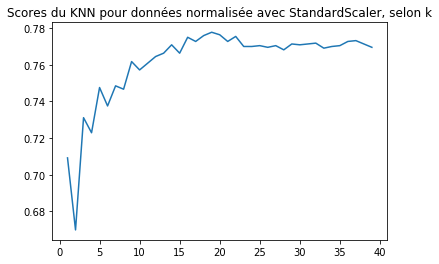

Meilleur score obtenu : 0.7777777777777778  pour k = 19


In [20]:
k_range = list(range(1, 40))
tunable_params = {'n_neighbors': k_range}
grid = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_ss, y_train)
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.title('Scores du KNN pour données normalisée avec StandardScaler, selon k')
plt.show()
print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score']), 
      ' pour k =', np.argmax(grid.cv_results_['mean_test_score']) + 1)

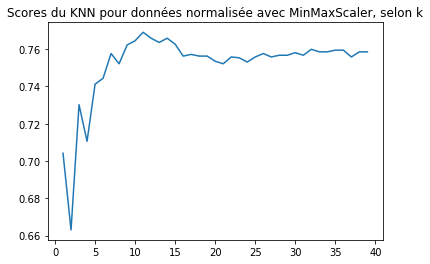

Meilleur score obtenu : 0.7690900777320531  pour k = 11


In [21]:
k_range = list(range(1, 40))
tunable_params = {'n_neighbors': k_range}
grid = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_mm, y_train)
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.title('Scores du KNN pour données normalisée avec MinMaxScaler, selon k')
plt.show()
print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score']), 
      ' pour k =', np.argmax(grid.cv_results_['mean_test_score']) + 1)

### Création d’un pipeline

#### On ne conserve que le StandardScaler comme technique de normalisation puisqu'elle donne globalement des meilleurs résultats dans notre cas

In [22]:
pipe = pipeline.Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler()),
    ('pca', decomposition.PCA(n_components=.95)),
    ('model', neighbors.KNeighborsClassifier(n_neighbors=19)),
])

evaluate(pipe, X_train, X_test, y_train, y_test)

print('\n')

pipe = pipeline.Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler()),
    ('pca', decomposition.PCA(n_components=.95)),
    ('model', tree.DecisionTreeClassifier(random_state=1)),
])

evaluate(pipe, X_train, X_test, y_train, y_test)

Accuracy du modèle : 0.7751371115173674
Precision du modèle : 0.8109339407744874
Recall du modèle : 0.898989898989899

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       272       332
Vrai 1       160      1424


Accuracy du modèle : 0.696983546617916
Precision du modèle : 0.8023637557452397
Recall du modèle : 0.7714646464646465

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       303       301
Vrai 1       362      1222


### Comparaison de plusieurs algorithmes d’apprentissage

In [23]:
def run_classifiers(clfs, X, y):
    for i in clfs:
        clf = clfs[i]
        print('-----------------')
        print(i)
        cv_acc = model_selection.cross_val_score(clf, X, y, cv=10)
        print("Accuracy: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        cv_acc = model_selection.cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
        print("AUC: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        # Plus important que les oui soient vrais donc on choisit de conserver la precision et non le rappel
        cv_acc = model_selection.cross_val_score(clf, X, y, cv=5, scoring='precision')
        print("Precision: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))

In [24]:
clfs = {
    'Bayes': naive_bayes.GaussianNB(),
    'RF': ensemble.RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': neighbors.KNeighborsClassifier(n_neighbors=19),
    'CART': tree.DecisionTreeClassifier(random_state=1),
    'AdaBoost': ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200),
    'MLP': neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=1),
    'Bagging': ensemble.BaggingClassifier(n_estimators=50, random_state=1)
}

run_classifiers(clfs, X_train_pca_ss, y_train)

-----------------
Bayes
Accuracy: 0.737 +/- 0.019
AUC: 0.774 +/- 0.019
Precision: 0.817 +/- 0.015
-----------------
RF
Accuracy: 0.764 +/- 0.023
AUC: 0.813 +/- 0.036
Precision: 0.810 +/- 0.014
-----------------
KNN
Accuracy: 0.764 +/- 0.023
AUC: 0.783 +/- 0.033
Precision: 0.799 +/- 0.019
-----------------
CART
Accuracy: 0.696 +/- 0.030
AUC: 0.625 +/- 0.037
Precision: 0.791 +/- 0.002
-----------------
AdaBoost
Accuracy: 0.785 +/- 0.022
AUC: 0.826 +/- 0.023
Precision: 0.819 +/- 0.012
-----------------
MLP
Accuracy: 0.725 +/- 0.022
AUC: 0.755 +/- 0.027
Precision: 0.810 +/- 0.012
-----------------
Bagging
Accuracy: 0.760 +/- 0.024
AUC: 0.805 +/- 0.034
Precision: 0.810 +/- 0.012


#### Nous avons préféré conserver la precision plutôt que le rappel, il nous semble plus intéressant que la majorité des vrais prédits soient positifs.
#### On s'apperçoit que dans notre cas le classifier le plus performant est l'AdaBoost avec la meilleure accuracy, meilleure AUC et meilleure precision.

## II. Apprentissage supervisé : Données hétérogènes

### Traitement en ne considérant qe les valeurs numériques

In [25]:
credit_data = pd.read_table('credit.data', header=None)
# Replace ? with nan
credit_data = credit_data.replace('?', np.nan)
# Replace + and - with 1 and 0
credit_data = credit_data.replace('+', 1)
credit_data = credit_data.replace('-', 0)
# Drop nan
credit_data = credit_data.dropna()
credit_data = credit_data._get_numeric_data()

In [26]:
credit_data.head()

,2,7,10,14,15
0,0.000,1.25,1,0,1
1,4.460,3.04,6,560,1
2,0.500,1.50,0,824,1
3,1.540,3.75,5,3,1
4,5.625,1.71,0,0,1


In [27]:
# Data
X = credit_data.ix[:, :14].values
# Target
y = credit_data.ix[:, 15].values

Dimensions des données : (653, 4)
Dimensions des targets : (653,)


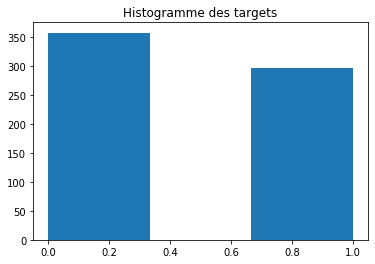

In [28]:
print('Dimensions des données :', X.shape)
print('Dimensions des targets :', y.shape)
plt.hist(y, bins=3)
plt.title('Histogramme des targets')
plt.show()

In [29]:
print('Dimensions de X :', X.shape)
print('Dimensions de y :', y.shape)

Dimensions de X : (653, 4)
Dimensions de y : (653,)


In [30]:
# StandardScaler
SS = preprocessing.StandardScaler()
SS.fit(X)
X_ss = SS.transform(X)

# PCA
pca = decomposition.PCA(n_components=.95)

pca.fit(X_ss)
X_pca_ss = pca.transform(X_ss)
X_pca_ss = np.append(X_ss[:], X_pca_ss[:, :3], axis=1)

In [31]:
run_classifiers(clfs, X_pca_ss, y)

-----------------
Bayes
Accuracy: 0.720 +/- 0.063
AUC: 0.806 +/- 0.062
Precision: 0.845 +/- 0.101
-----------------
RF
Accuracy: 0.731 +/- 0.069
AUC: 0.800 +/- 0.063
Precision: 0.716 +/- 0.067
-----------------
KNN
Accuracy: 0.753 +/- 0.076
AUC: 0.811 +/- 0.068
Precision: 0.859 +/- 0.086
-----------------
CART
Accuracy: 0.698 +/- 0.053
AUC: 0.691 +/- 0.054
Precision: 0.667 +/- 0.078
-----------------
AdaBoost
Accuracy: 0.773 +/- 0.057
AUC: 0.836 +/- 0.068
Precision: 0.780 +/- 0.076
-----------------
MLP
Accuracy: 0.737 +/- 0.054
AUC: 0.776 +/- 0.075
Precision: 0.718 +/- 0.054
-----------------
Bagging
Accuracy: 0.756 +/- 0.075
AUC: 0.800 +/- 0.065
Precision: 0.741 +/- 0.063


### Traitement en considérant toutes les données

In [32]:
credit_data = pd.read_table('credit.data', header=None)
# Replace + and - with 1 and 0
credit_data = credit_data.replace('+', 1)
credit_data = credit_data.replace('-', 0)

# Data
X = credit_data.ix[:, :14].values
# Target
y = credit_data.ix[:, 15].values

# Define columns
col_num = [1, 2, 7, 10, 13, 14]
col_cat = [0, 3, 4, 5, 6, 8, 9, 11, 12]

In [33]:
credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [34]:
# Handle categorial columns
X_cat = np.copy(X)
X_cat = X_cat.take(col_cat, axis=1)
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = preprocessing.Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

# Handle numeric columns
X_num = np.copy(X[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = preprocessing.Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

# StandardScaler
SS = preprocessing.StandardScaler()
SS.fit(X_num)
X_num_ss = SS.transform(X_num)

# PCA
pca = decomposition.PCA(n_components=.95)

pca.fit(X_num_ss)
X_num_pca_ss = pca.transform(X_num_ss)
X_num_pca_ss = np.append(X_num_ss[:], X_num_pca_ss[:, :3], axis=1)

C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
# Convert categorial values to binary
X_cat_bin = preprocessing.OneHotEncoder().fit_transform(X_cat).toarray()

In [36]:
# Construct back the whole dataset set and run all classifiers
X_total = np.concatenate((X_cat, X_num_pca_ss), axis=1)

run_classifiers(clfs, X_total, y)

-----------------
Bayes
Accuracy: 0.768 +/- 0.071
AUC: 0.876 +/- 0.092
Precision: 0.830 +/- 0.112
-----------------
RF
Accuracy: 0.846 +/- 0.128
AUC: 0.915 +/- 0.085
Precision: 0.843 +/- 0.155
-----------------
KNN
Accuracy: 0.773 +/- 0.077
AUC: 0.851 +/- 0.091
Precision: 0.808 +/- 0.121
-----------------
CART
Accuracy: 0.782 +/- 0.102
AUC: 0.780 +/- 0.094
Precision: 0.772 +/- 0.138
-----------------
AdaBoost
Accuracy: 0.842 +/- 0.141
AUC: 0.918 +/- 0.080
Precision: 0.832 +/- 0.166
-----------------
MLP
Accuracy: 0.827 +/- 0.111
AUC: 0.888 +/- 0.091
Precision: 0.856 +/- 0.149
-----------------
Bagging
Accuracy: 0.839 +/- 0.132
AUC: 0.911 +/- 0.095
Precision: 0.817 +/- 0.148


In [37]:
# Test with binarized cat columns
X_total_bin = np.concatenate((X_cat_bin, X_num_pca_ss), axis=1)

run_classifiers(clfs, X_total_bin, y)

-----------------
Bayes
Accuracy: 0.724 +/- 0.047
AUC: 0.862 +/- 0.085
Precision: 0.854 +/- 0.099
-----------------
RF
Accuracy: 0.849 +/- 0.137
AUC: 0.920 +/- 0.083
Precision: 0.847 +/- 0.163
-----------------
KNN
Accuracy: 0.839 +/- 0.102
AUC: 0.899 +/- 0.097
Precision: 0.863 +/- 0.136
-----------------
CART
Accuracy: 0.802 +/- 0.091
AUC: 0.801 +/- 0.082
Precision: 0.776 +/- 0.152
-----------------
AdaBoost
Accuracy: 0.838 +/- 0.144
AUC: 0.920 +/- 0.078
Precision: 0.830 +/- 0.165
-----------------
MLP
Accuracy: 0.791 +/- 0.124
AUC: 0.837 +/- 0.118
Precision: 0.801 +/- 0.141
-----------------
Bagging
Accuracy: 0.841 +/- 0.141
AUC: 0.914 +/- 0.092
Precision: 0.831 +/- 0.153


#### On observe des résultats bien meilleurs lorsque l'on considère le dataset dans son ensemble. 
#### On peut également constater que les résultats sont globalement légèrement suppérieurs avec les données catégorielles binarisées.
#### Le classifier semblant le plus performant avec ce dataset est la random forest

## III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification